In [1]:
import edhec_risk_kit as erk
import numpy as np
import pandas as pd

In [2]:
ind = erk.get_ind_return()
er = erk.annualize_return(ind["1996":"2000"],12)
cov = ind["1996":"2000"].cov()

In [14]:
from scipy.optimize import minimize
def maximize_sharpe_ratio(risk_free_rate, er, cov):
    """
    risk free rate + ER + Cov -> w
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n,n)
    bounds = ((0.0,1.0),)*n
    weights_sum_to_one = {
        'type':'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    def neg_sharpe_ratio(weights, risk_free_rate, er, cov):
        """
        Returns the engative of sharpe ratio
        """
        returns = erk.portfolio_return(weights,er)
        volatility = erk.portfolio_vol(weights,cov)
        return -((returns - risk_free_rate)/volatility)
            
    results = minimize(neg_sharpe_ratio,init_guess,
                       args=(risk_free_rate, er, cov,),
                       method='SLSQP',
                       options={'disp':False},
                       constraints=(weights_sum_to_one),
                       bounds=bounds
                      )
    return results.x

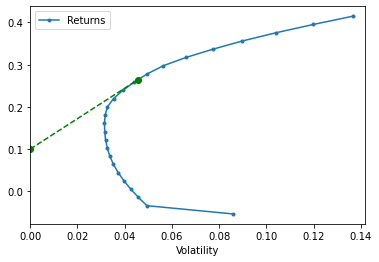

In [13]:
ax = erk.plot_efN(25,er,cov)
ax.set_xlim(left=0)

risk_free_rate = 0.1
weight_max_sharpe_ratio = maximize_sharpe_ratio(risk_free_rate,er,cov)
return_max_sharpe_ratio = erk.portfolio_return(weight_max_sharpe_ratio,er)
volatility_max_sharpe_ratio = erk.portfolio_vol(weight_max_sharpe_ratio,cov)


# Add CML
cml_x = [0,volatility_max_sharpe_ratio]
cml_y = [risk_free_rate, return_max_sharpe_ratio]
ax.plot(cml_x,cml_y,color='green',marker='o',linestyle='dashed')

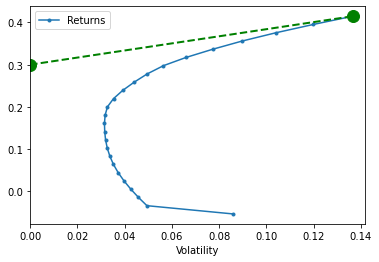

In [4]:
erk.plot_efN(25,er,cov,show_cml=True, risk_free_rate=0.3)